***EX1***

<ipython-input-47-0eae68652fd5>:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


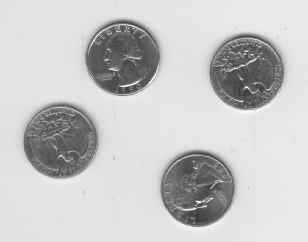

(242, 308)


In [47]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt

# original image
img = cv2.imread('/content/eight.jpg', 0)
cv2_imshow(img)
print(img.shape)

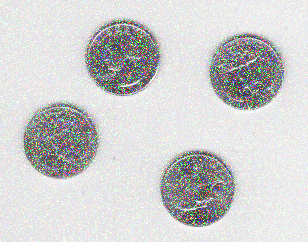

-1

In [48]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/eight.jpg')
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)
cv2.waitKey(0)

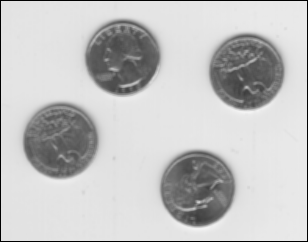

In [49]:
# Low Pass SPatial Domain Filtering
# to observe the blurring effect
import cv2
import numpy as np
# Read the image
img = cv2.imread('/content/eight.jpg', 0)


# Obtain number of rows and columns
# of the image
m, n = img.shape

# Develop Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])

for i in range(1, m-1):
 for j in range(1, n-1):
  temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
  
  img_new[i, j]= temp
  
img_new = img_new.astype(np.uint8)
cv2.imwrite('blurred.tif', img_new)
cv2_imshow(img_new)

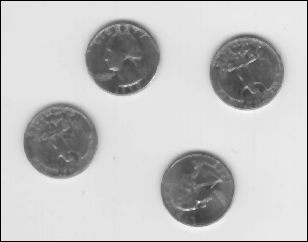

In [50]:
# Median Spatial Domain Filtering
import cv2
import numpy as np

# Read the image
img_noisy1 = cv2.imread('/content/eight.jpg', 0)

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
 for j in range(1, n-1):
  temp = [img_noisy1[i-1, j-1],
   img_noisy1[i-1, j],
   img_noisy1[i-1, j + 1],
   img_noisy1[i, j-1],
   img_noisy1[i, j],
   img_noisy1[i, j + 1],
   img_noisy1[i + 1, j-1],
   img_noisy1[i + 1, j],
   img_noisy1[i + 1, j + 1]]
  
  temp = sorted(temp)
  img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
cv2.imwrite('new_median_filtered.png', img_new1)
cv2_imshow(img_new1)

In [51]:
median = cv2.medianBlur(img_gauss, 5)

Text(0.5, 1.0, 'Median Filter (5*5)')

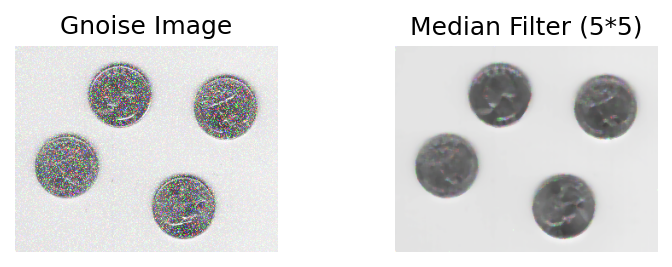

In [52]:
fig=plt.figure(dpi=150)

fig.add_subplot(2,2,1)
plt.imshow(img_gauss,cmap='gray')
plt.axis("off")
plt.title("Gnoise Image")

fig.add_subplot(2,2,2)
plt.imshow(median,cmap='gray')
plt.axis("off")
plt.title("Median Filter (5*5)")



In [53]:
median1 = cv2.medianBlur(img_gauss, 7)

Text(0.5, 1.0, '(7*7)')

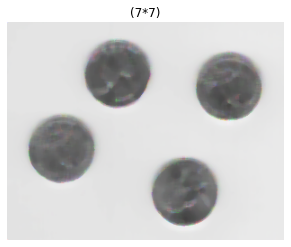

In [54]:
fig.add_subplot(2,2,3)
plt.imshow(median1,cmap='gray')
plt.axis("off")
plt.title("(7*7)")



In [55]:
median2 = cv2.medianBlur(img_gauss, 9)

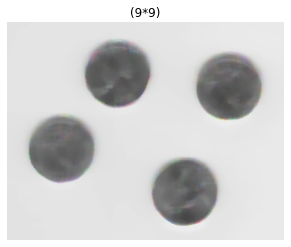

In [56]:
fig.add_subplot(2,2,4)
plt.imshow(median2,cmap='gray')
plt.axis("off")
plt.title("(9*9)");

In [57]:
blur = cv2.blur(img_gauss,(5,5))


Text(0.5, 1.0, 'Average Filter (5*5)')

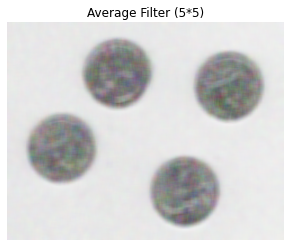

In [58]:
fig.add_subplot(2,2,3)
plt.imshow(blur1,cmap='gray')
plt.axis("off")
plt.title("Average Filter (5*5)")


In [59]:
blur1 = cv2.blur(img_gauss,(7,7))

Text(0.5, 1.0, '(7*7)')

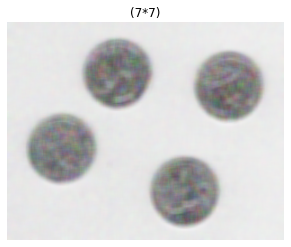

In [60]:
fig.add_subplot(2,2,3)
plt.imshow(blur1,cmap='gray')
plt.axis("off")
plt.title("(7*7)")



In [61]:
blur2 = cv2.blur(img_gauss,(9,9))

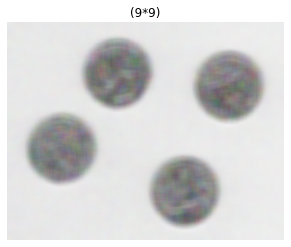

In [62]:
fig.add_subplot(2,2,4)
plt.imshow(blur2,cmap='gray')
plt.axis("off")
plt.title("(9*9)");

# ***Ex2***

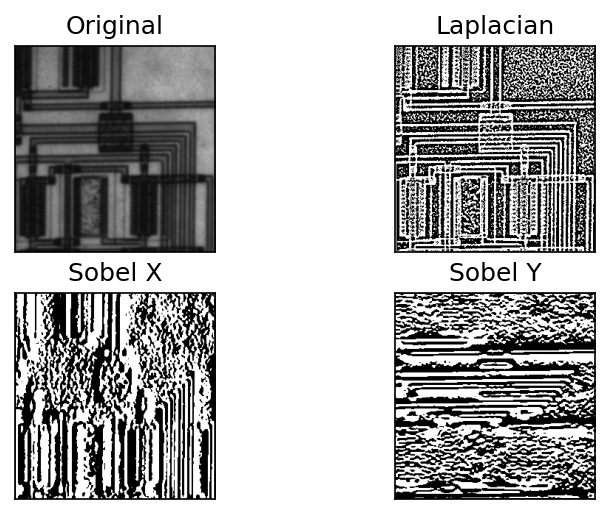

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
img = cv2.imread('/content/circuit.jpg',)

# remove noise
img = cv2.GaussianBlur(img,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y
 
fig=plt.figure(dpi=150)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()